In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("./load_data/data/dropped_data.csv")

In [4]:
data = data.drop(columns = "Unnamed: 0")

In [5]:
data = data.reindex(index = data.index[::-1])
table = data.set_index('dates')

In [6]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [7]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = 33
num_portfolios = 50000

In [8]:
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [9]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(table):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [10]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in table]

# reorder dataframe columns
df = df[column_order]

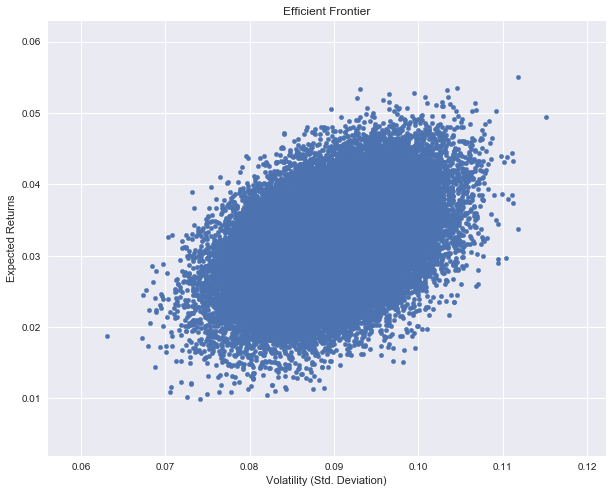

In [11]:
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [12]:
df.head()

,Returns,Volatility,VTSMX Weight,VFINX Weight,VIVAX Weight,VIMSX Weight,VMVIX Weight,NAESX Weight,VISVX Weight,VDAIX Weight,...,GLD Weight,PCRIX Weight,EMB Weight,PIGLX Weight,VICSX Weight,VBMFX Weight,VIPSX Weight,VWITX Weight,VFSTX Weight,VFISX Weight
0,0.028742,0.083543,0.046503,0.008281,0.040997,0.039470,0.033362,0.023620,0.056837,0.025295,...,0.040595,0.039359,0.039801,0.050675,0.024745,0.025528,0.049078,0.032045,0.043432,0.024318
1,0.030480,0.087034,0.006190,0.041171,0.031244,0.025726,0.042001,0.034540,0.023800,0.013306,...,0.024006,0.033749,0.027290,0.016752,0.018022,0.037773,0.053504,0.006427,0.049228,0.034523
2,0.040534,0.101537,0.043125,0.042735,0.002258,0.061572,0.050516,0.006693,0.037234,0.046899,...,0.049505,0.003110,0.048801,0.006177,0.043741,0.000513,0.013717,0.028095,0.002926,0.014755
3,0.034085,0.079933,0.054587,0.035778,0.020663,0.038688,0.003448,0.006945,0.067376,0.019095,...,0.039758,0.020281,0.060411,0.007488,0.031844,0.024263,0.064268,0.039706,0.017970,0.035710
4,0.037359,0.088950,0.017897,0.015689,0.041256,0.034715,0.052521,0.019919,0.050527,0.040540,...,0.002369,0.015802,0.049839,0.039341,0.036450,0.043746,0.026001,0.041317,0.051435,0.000092


In [57]:
#Now lets 
#maximize risk and minimize return 
#minimize risk and maximize return 
#middle ground


In [13]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []


In [14]:
# set the number of combinations for imaginary portfolios
num_assets = 33
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

In [15]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [16]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(table):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

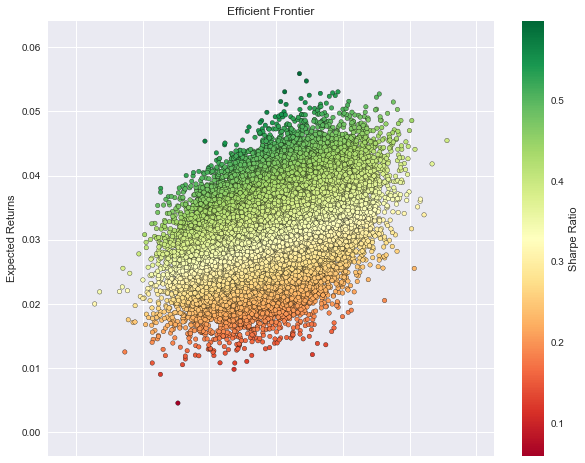

In [17]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in table]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

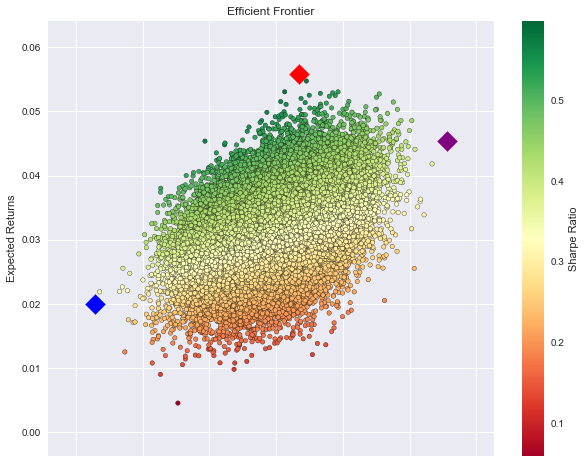

In [22]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_volatility = df['Volatility'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_volatility_port = df.loc[df['Volatility'] == min_volatility]
max_volatility_port = df.loc[df['Volatility'] == max_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_volatility_port['Volatility'], y=min_volatility_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=max_volatility_port['Volatility'], y=max_volatility_port['Returns'], c='purple', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [35]:
all_port = [min_volatility_port, max_volatility_port, sharpe_portfolio]
port_val = pd.concat(all_port, axis=0)
port_val = port_val.set_index(pd.Index(["min_vol", "max_vol", "max_sharpe"]))

In [39]:
port_val.to_csv('./portfolio/mef_portfolios.csv')